# **This is The machine learning final project from Fares and Meshal**

---




#The Content of
##1) Problem Definition

* Define the main goal of the project
* Identify the ML problem type (Classification / Regression / Clustering / NLP / CV)

##2) Data Collection


* Identify the source of the dataset (CSV / Kaggle / API / Web Scraping)
* Check class balance(if classification)

##3) Exploratory Data Analysis (EDA)

* Display first 5–10 rows
* Generate summary statistics (mean, std, min, max, etc.)
* Visualize distributions (histogram, boxplot, KDE)
* Analyze correlations and relationships between features

##4) Data Cleaning

* Handle missing values
* Remove or treat outliers
* Fix inconsistent values
* Encode categorical data

##5) Data Preprocessing

* Split data into Training and Testing sets
* Apply feature scaling or normalization (if needed)
* Perform feature selection (optional)

##6) Model Selection

* Choose at least one suitable ML algorithm
* Justify why this model was selected

##7) Model Training

* Train the model using training data
* Document the training process and observations

##8) Model Evaluation

* Evaluate using at least 2–3
  
  Examples:
  * Classification → Accuracy, Precision, Recall, F1, Confusion Matrix
  * Regression → MAE, MSE, RMSE

##9) Model Improvement

* Test different algorithms
* Improve dataset
* Compare performance before and after improvements

##10) Reporting & Presentation

* Summarize the full workflow and final results
* Explain challenges and how they were solved
* Include graphs and visualizations
* Provide final conclusion and possible future improvements


# **1) Problem Definition**

The machine learning model is going to be Linear Regression and the goal is going to be predicting the price of diamonds based on the carat, cut, color, and clarity

# 2) **Data Collection**

We will import and save the data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds (1).csv


In [5]:
# ---------------------- Data handling ----------------------
import pandas as pd  # For working with dataframes and reading CSV files
import numpy as np   # For numerical operations and arrays

# ---------------------- Visualization ----------------------
import matplotlib.pyplot as plt  # For basic plotting and graphs
import seaborn as sns            # For advanced plots (heatmaps, pairplots, styling)

# ---------------------- Models -----------------------------
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.metrics import mean_squared_error     # To calculate MSE (model error)
from sklearn.model_selection import train_test_split  # To split data into train/test sets

# ---------------------- Preprocessing ----------------------
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # For encoding categories & scaling numbers
from sklearn.compose import ColumnTransformer  # To apply different preprocessing to different columns
from sklearn.pipeline import Pipeline           # To connect preprocessing + model into one pipeline

# ---------------------- Evaluation --------------------------
from sklearn.metrics import r2_score, mean_squared_error  # R² score + MSE for model performance

# ---------------------- GUI --------------------------------
import gradio as gr   # For building a simple web interface
import pickle         # For saving/loading trained models
import numpy as np    # For handling numerical inputs in the GUI


In [32]:
df = pd.read_csv('diamonds.csv')

#**3) Exploratory Data Analysis (EDA)**
---
In here we will display a summary of the data and showing the data

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


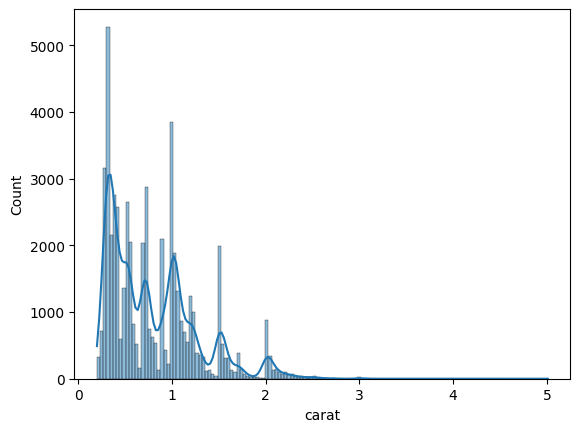

In [ ]:
sns.histplot(data=df, x='carat', kde=True)
plt.show()

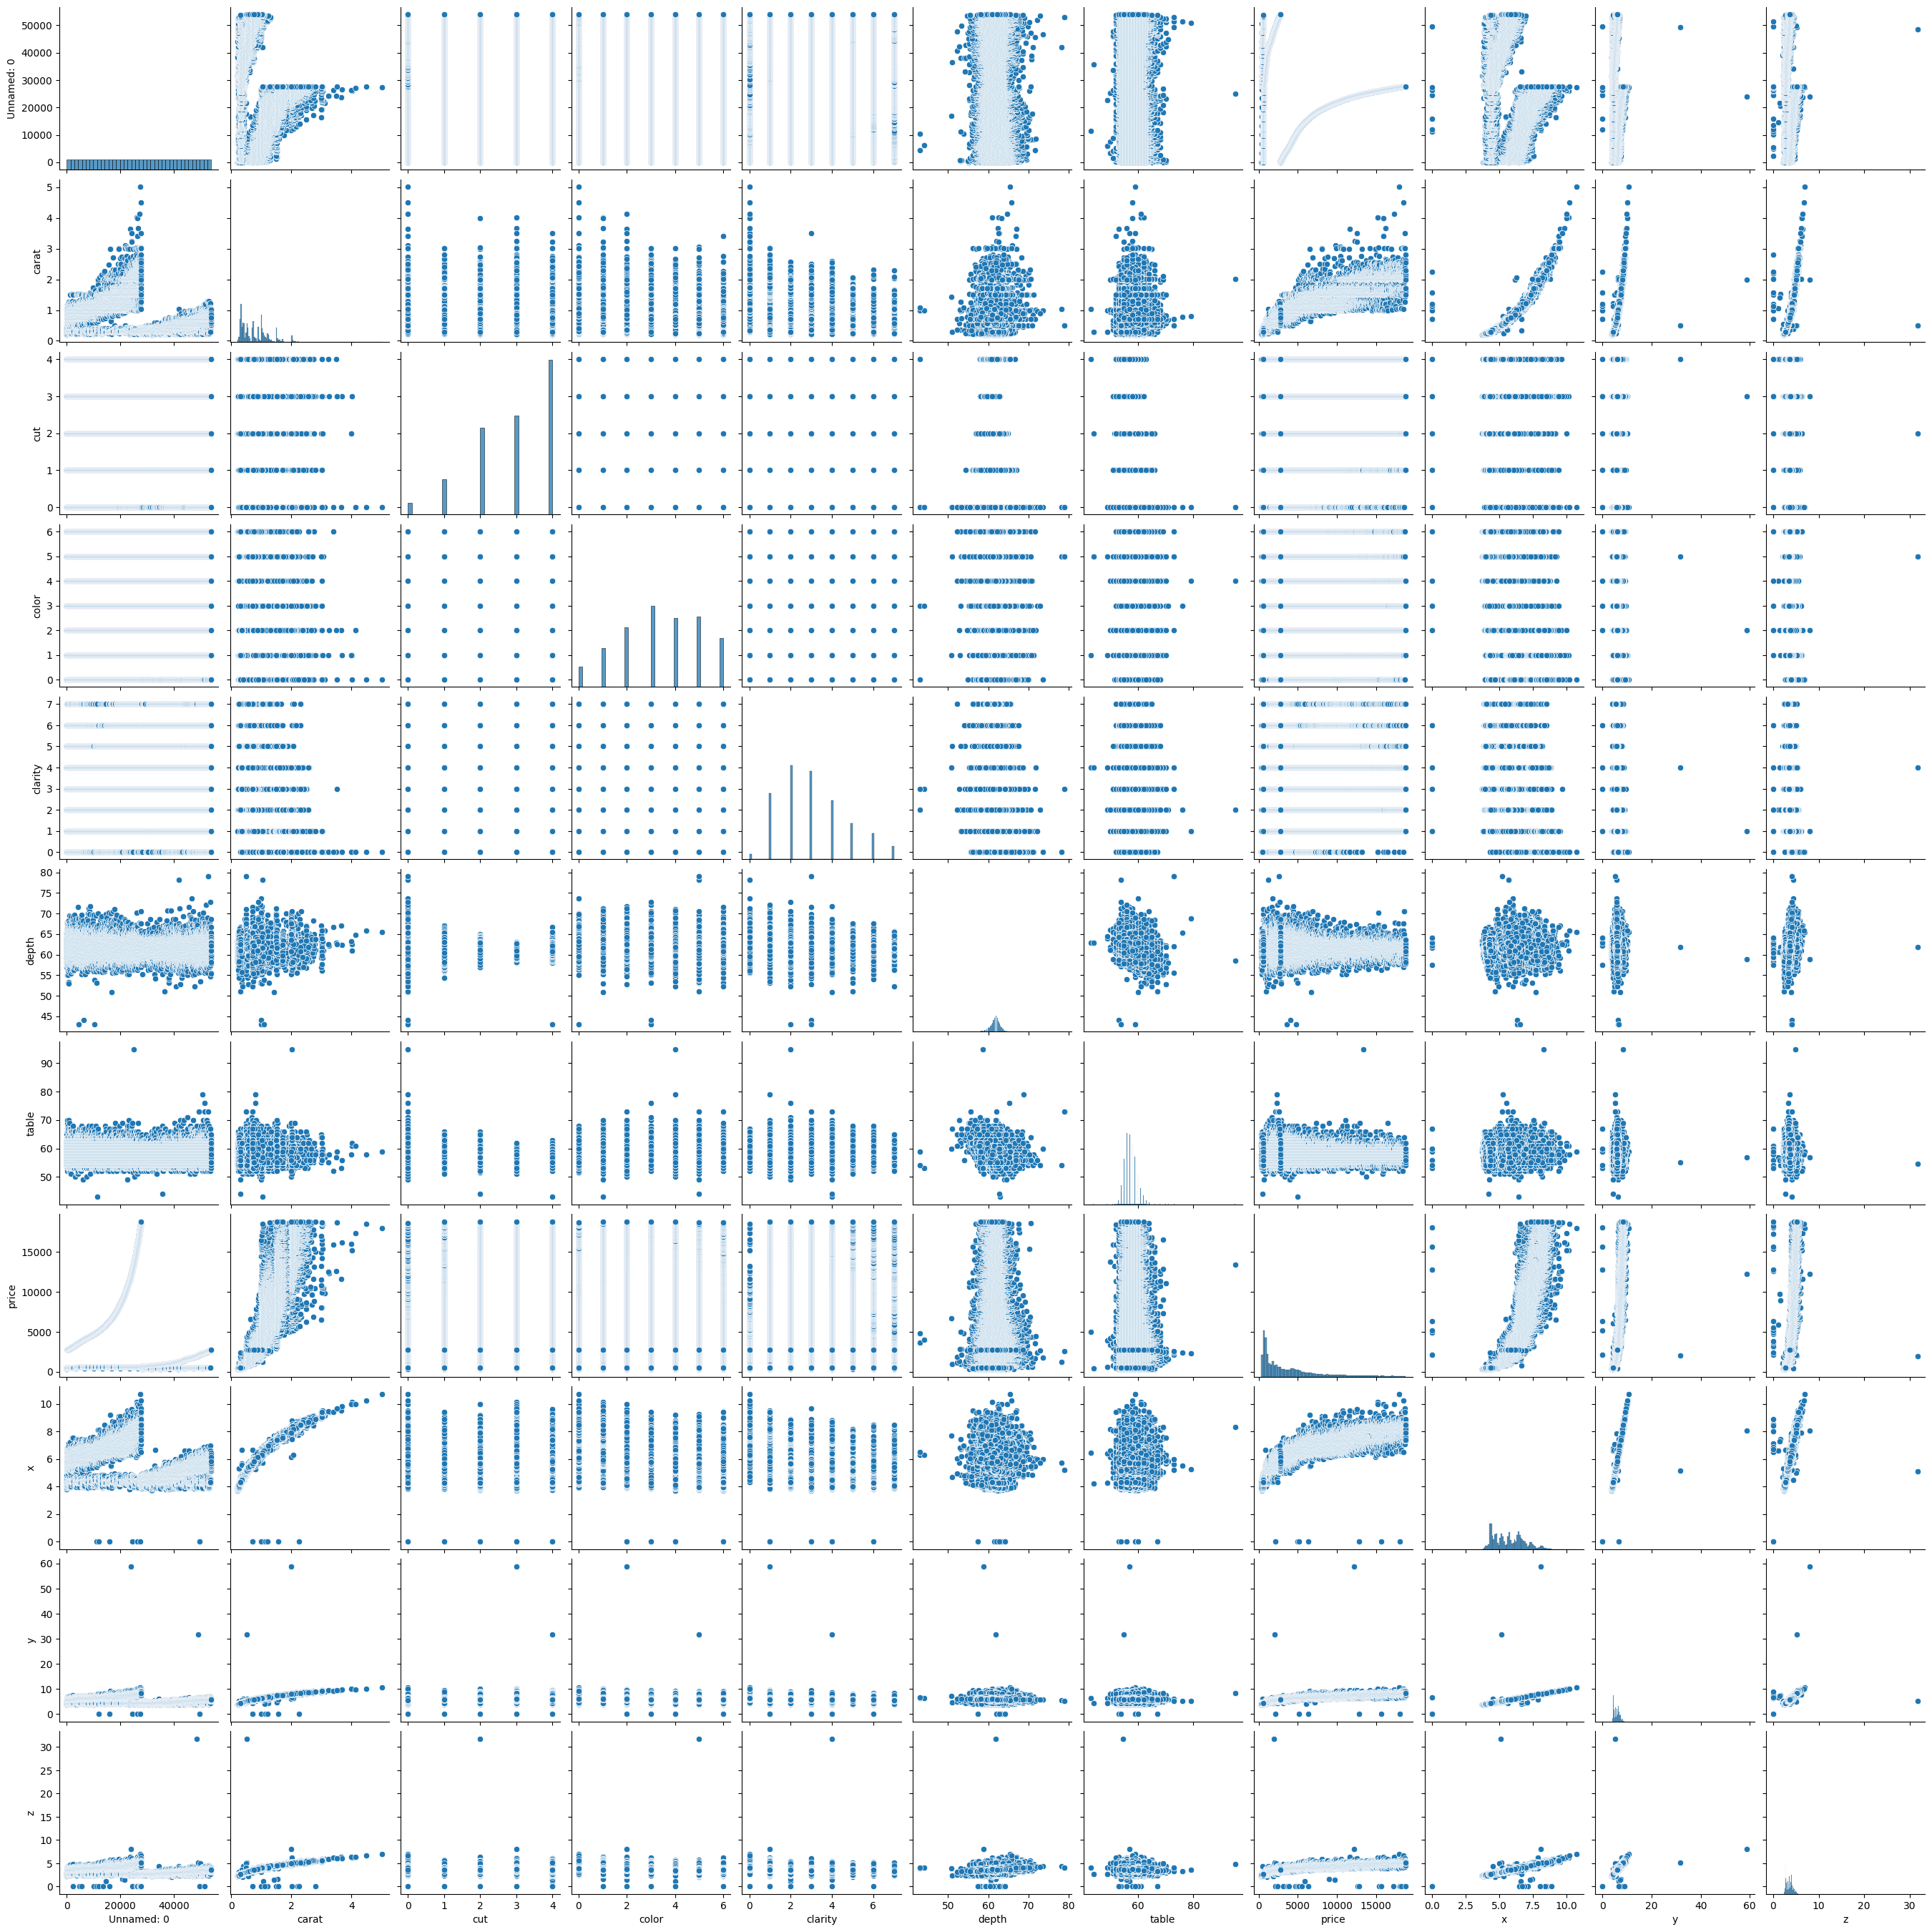

In [ ]:
sns.pairplot(df)

<Figure size 50000x50000 with 0 Axes>

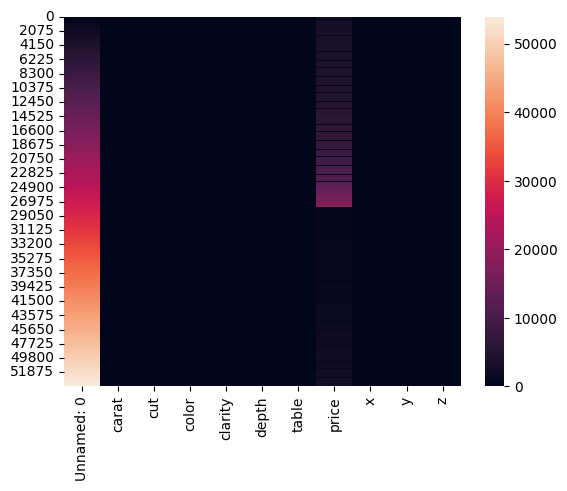

<Figure size 50000x50000 with 0 Axes>

In [ ]:
sns.heatmap(df)
plt.figure(figsize = (500,500))

##

# **4) Data Cleaning**
In here we are going to use mapping to encode catagorial data, And we are also going to remove all non numbers to clean the data

In [20]:
X = df.drop("price", axis=1)
y = df["price"]

In [21]:
cut_mapping = {
    "Fair": 0,
    "Good": 1,
    "Very Good": 2,
    "Premium": 3,
    "Ideal": 4
}

df['cut'] = df['cut'].map(cut_mapping)

clarity_mapping = {"I1":0,"SI2":1,"SI1":2,"VS2":3,"VS1":4,"VVS2":5,"VVS1":6,"IF":7}
df['clarity'] = df['clarity'].map(clarity_mapping)

color_mapping = {"J":0,"I":1,"H":2,"G":3,"F":4,"E":5,"D":6}
df['color'] = df['color'].map(color_mapping)
df = df.dropna()

In [22]:
numeric_cols = ['carat','cut','color','clarity']
X = df[numeric_cols]
y = df['price']

#

# **5) Data Preprocessing**
The only thing we are going to do here is split the data into training and testing datasets

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# **6) Model Selection**
The algrothim we're using is linear regression because we are mostly working with floats and integers

#**7) Model Training**
We are going to train it using linear regression

In [24]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# **8) Model Evaluation**
We are going to use MSE (mean squared error) and R^2 score to evaluate

In [27]:
y_pred = model.predict(x_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.9015213637374608
MSE: 1577745.3895516433


# **9) Model Improvement**
Other algrothims we could use are LogisticRegression and DummyClassifier but we used Linear regression because we are working with floats and integers

# **10) Reporting & Presentation**
This is the end of the project down below, u can use the interface below to try the project

#**11) Bonus**
Below we are going to add a gui feature using Gardio

In [28]:
my_model = model

In [29]:
with open("model.pkl", "wb") as f:
    pickle.dump(my_model, f)

In [30]:
model = pickle.load(open("model.pkl", "rb"))



feature_names = [
    "carat","cut","color","clarity"
]


def predict_price(*values):
    values = np.array(values).reshape(1, -1)
    result = model.predict(values)[0]
    return f"{result}"


inputs_ui = []

for feature in feature_names:
    inputs_ui.append(gr.Number(label=feature))



demo = gr.Interface(
    fn=predict_price,
    inputs=inputs_ui,
    outputs=gr.Textbox(label="Output"),
    title="Diamond price predictor",
    description="Enter the specifications of the Diamond"
)


demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5d54816e1e485a5cdb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
